In [1]:
import torch
import math
torch.set_grad_enabled(False)

In [10]:
#build networks combining fully connected layers, Tanh, and ReLU,
#run the forward and backward passes,
#optimize parameters with SGD for MSE.

In [39]:
def generate_set():
    training_set = torch.empty(1000,2).uniform_(0,1)  #x et y
    training_classes = torch.empty(1000)
    testing_set = torch.empty(1000,2).uniform_(0,1)  #x et y
    testing_classes = torch.empty(1000)

    r = torch.empty(1,1).fill_(1/(2*math.pi)).pow(1/2)

    for i in range (1000):
        if ((training_set[i] - torch.Tensor([0.5,0.5])).pow(2).sum()).pow(1/2).item() < r.item():
            training_classes[i] = 1
        else:
            training_classes[i] = 0

        if ((testing_set[i] - torch.Tensor([0.5,0.5])).pow(2).sum()).pow(1/2).item() < r.item():
            testing_classes[i] = 1
        else:
            testing_classes[i] = 0
    return training_set, training_classes, testing_set, testing_classes

In [40]:
training_set, training_classes, testing_set, testing_classes = generate_set()

tensor([0.9580, 0.8544]) tensor(0.)


tensor(515)
tensor(485)


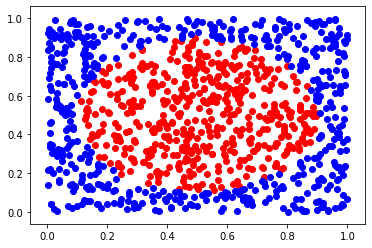

In [47]:
import matplotlib.pyplot as plt
plt.figure('1')
x = training_set[:,0]
y = training_set[:,1]
plt.scatter(x[training_classes==1], y[training_classes==1], color='r')
plt.scatter(x[training_classes==0], y[training_classes==0], color='b')

print(sum(training_classes==0))
print(sum(training_classes==1))
plt.show()

In [48]:
"""training_set = torch.empty(1000,2).uniform_(0,1)  #x et y
training_classes = torch.empty(1000,1)
testing_set = torch.empty(1000,2).uniform_(0,1)  #x et y
testing_classes = torch.empty(1000,1)

r = torch.empty(1,1).fill_(1/(2*math.pi)).pow(1/2)

for i in range (1000):
    if (training_set[i].pow(2).sum()).pow(1/2).item() < r.item():
        training_classes[i] = 1
    else:
        training_classes[i] = 0
    
    if (testing_set[i].pow(2).sum()).pow(1/2).item() < r.item():
        testing_classes[i] = 1
    else:
        testing_classes[i] = 0

#builds a network with two input units, two output units, three hidden layers of 25 units,
#trains it with MSE, logging the loss,
#computes and prints the ﬁnal train and the test errors."""

'training_set = torch.empty(1000,2).uniform_(0,1)  #x et y\ntraining_classes = torch.empty(1000,1)\ntesting_set = torch.empty(1000,2).uniform_(0,1)  #x et y\ntesting_classes = torch.empty(1000,1)\n\nr = torch.empty(1,1).fill_(1/(2*math.pi)).pow(1/2)\n\nfor i in range (1000):\n    if (training_set[i].pow(2).sum()).pow(1/2).item() < r.item():\n        training_classes[i] = 1\n    else:\n        training_classes[i] = 0\n    \n    if (testing_set[i].pow(2).sum()).pow(1/2).item() < r.item():\n        testing_classes[i] = 1\n    else:\n        testing_classes[i] = 0\n\n#builds a network with two input units, two output units, three hidden layers of 25 units,\n#trains it with MSE, logging the loss,\n#computes and prints the ﬁnal train and the test errors.'

# LINEAR

In [61]:
#LINEAR MODULE (FULLY CONNECTED LAYER)
#mini batch : x[mini_batch_size * D]D=2
class Linear(object):
    def __init__(self, dimension, nb_data_in, nb_data_out):
        #x = nb_data_in x dim in my calculation, but here transpose (dim x nb_data_in)
        #y = nb_data_out x dim in my calculation, but here transpose (dim x nb_data_out)
        k = math.sqrt(1/nb_data_in)
        self.weight = torch.empty(nb_data_out,nb_data_in).uniform_(-k,k)
        self.bias = torch.empty(nb_data_out,dimension).uniform_(-k,k)
        self.grad_weight = None
        self.grad_bias = None
        self.input = None
    
    def forward(self , *input, nb_layer):
        #All the calculation were done considering x = nb_data_in x dim (as seen in the lesson)
        #So to simplify the comprehension, we do a first transpose, do the the calculations with this
        #then transpose again after, to have the correct dimension output
        print('input forward before')
        print(input)
        #save x with dim = dim x nb_data_in
        if(nb_layer > 1):
            input = input[0]
            #pour le premier, on aura en entrée un ou plusieurs tensors (donne tuple quand rentré dans f)
            
        print('input forward after')
        print(input)
        #save x with dim = dim x nb_data_in    
        self.input = input
        output = []
        
        for x in input:
            print('x')
            print(x)
            #x = dim x nb_data_in -> nb_data_in x dim
            x_correct_dim = x.t()
            #y = nb_data_out x dim
            y_correct_dim = None

            #dim analysis: [nb_data_out x nb_data_in] x [nb_data_in x dim] + [nb_data_out x dim]
            y_correct_dim = ((self.weight).matmul(x_correct_dim)+self.bias)

            #append y = [dim x nb_data_out] to respect lin module
            output.append(y_correct_dim.t()) 
        return tuple(output)
    
    def backward(self, *gradwrtoutput):
        dl_dx  = None
        dl_dw = []
        dl_db = []
        gradaccumulated = []
        print('g bef')
        print(gradwrtoutput)
        gradwrtoutput = gradwrtoutput[0]
        print('g aft')
        print(gradwrtoutput)
        print(len(gradwrtoutput))
        
        for i in range (len(gradwrtoutput)):
            #X = dim x nb_data_in -> nb_data_in x dim
            x_correct_dim = self.input[i].t()
            
            #X = dim x nb_data_out -> nb_data_out x dim
            print('g i')
            #if(len(gradwrtoutput) == 1):
                
            #print(gradwrtoutput.t())
            #print(gradwrtoutput.t().size())
            grad_correct_dim = gradwrtoutput[i].t()
            print(grad_correct_dim)
            
            #dl_dx = w^T x dl_dy (gradwrtoutput)
            #dim analysis: nb_data_in x dim = [nb_data_in x nb_data_out] x [nb_data_out x dim]
            dl_dx = (self.weight).t().matmul(grad_correct_dim)
            #nb_data_in x dim -> dim x nb_data_in
            gradaccumulated.append(dl_dx.t())
            
            #dl_db = dl_dy
            #dim analysis: nb_data_out x dim (car b = nb_data_out x dim)
            dl_db.append(grad_correct_dim)
            
            #dl_dw = dl_dy x X^T
            #dim analysis: nb_data_out x nb_data_in = [nb_data_out x dim] x [dim x nb_data_in]
            dl_dw.append(grad_correct_dim.matmul(x_correct_dim.t()))
            
        self.grad_weight = dl_dw
        self.grad_bias = dl_db

        return tuple(gradaccumulated)
        
    def param(self):
        output = [[self.weight, self.grad_weight], [self.bias, self.grad_bias]]
        return output
    
    #https://pytorch.org/docs/stable/nn.html#linear-layers

In [64]:
a = torch.empty(1,2).normal_()
b = torch.empty(a.size()).normal_()
l = []
l.append(a)
l.append(b)
i = tuple(l)
print('input')
#print(a,b)
print(i)

print('dim = ', i[0].size(0),' input =', i[0].size(1))
nb_out = 3
print('nb_out = ', nb_out)

lin = Linear(i[0].size(0),i[0].size(1),nb_out)
f = lin.forward(i,nb_layer = 2)
print('forward')
print(f)

input
(tensor([[ 0.8324, -0.3725]]), tensor([[-0.6950, -1.0685]]))
dim =  1  input = 2
nb_out =  3
input forward before
((tensor([[ 0.8324, -0.3725]]), tensor([[-0.6950, -1.0685]])),)
input forward after
(tensor([[ 0.8324, -0.3725]]), tensor([[-0.6950, -1.0685]]))
x
tensor([[ 0.8324, -0.3725]])
x
tensor([[-0.6950, -1.0685]])
forward
(tensor([[-0.9116, -1.2593, -0.9299]]), tensor([[-0.3421, -0.4755, -0.4136]]))


In [63]:
a = torch.empty(1,2).normal_()
l = []
l.append(a)
i = tuple(l)
print('input')
print(a)
print(i)

print('dim = ', i[0].size(0),' input =', i[0].size(1))
nb_out = 3
print('nb_out = ', nb_out)

lin = Linear(i[0].size(0),i[0].size(1),nb_out)
f = lin.forward(i,nb_layer = 2)
print('forward')
print(f)

input
tensor([[1.4728, 2.2418]])
(tensor([[1.4728, 2.2418]]),)
dim =  1  input = 2
nb_out =  3
input forward before
((tensor([[1.4728, 2.2418]]),),)
input forward after
(tensor([[1.4728, 2.2418]]),)
x
tensor([[1.4728, 2.2418]])
forward
(tensor([[-1.5019,  1.0424,  0.6305]]),)


In [65]:
g = []
grad = torch.empty(i[0].size(0),nb_out).normal_()
g.append(grad)
gr = tuple(g)
print('grad')
print(gr)
output = lin.backward(gr)
print('gradaccumulated')
print(output)

grad
(tensor([[-0.5406, -0.9405, -1.2741]]),)
g bef
((tensor([[-0.5406, -0.9405, -1.2741]]),),)
g aft
(tensor([[-0.5406, -0.9405, -1.2741]]),)
1
g i
tensor([[-0.5406],
        [-0.9405],
        [-1.2741]])
gradaccumulated
(tensor([[ 1.3945, -0.6135]]),)


In [ ]:
p = lin.param()
print('weight and grad')
print('must be of size', nb_out, ' x ', a.size(1))
print('size', p[0][0].size(0), p[0][0].size(1))
#print(p[0][0], p[0][1])
print('bias and grad')
print('must be of size', nb_out, ' x ', a.size(0))
print('size', p[1][0].size(0), p[1][0].size(1))
#print(p[1][0], p[1][1])

# RELU

In [81]:
#RELU MODULE
class ReLU():
    def __init__(self):
        self.input = None
    
    def forward(self, *input):
        print('input ReLU sans correction')
        print(input)
        
        input = input[0]
        liste = []
        self.input = input
        print('input corrected')
        print(input)
        for x in input:
            print(x)
            liste.append(torch.max(x,torch.zeros_like(x))) 
        output = tuple(liste)
        return output
        
    def backward(self, *gradwrtoutput): 
        #add input as param ? 
        #No, parameters are w and b when linear, but input is saved has if we have to give backward and input
        #in the case they're both tuple of tensors of size not know
        #it's complicated (maybe impossible) to code it with the * (let the size be whatever we want)
        derivative = []
        gradaccumulated = []
        print('gradwrtoutput before')
        print(gradwrtoutput)
        gradwrtoutput = gradwrtoutput[0]
        print('gradwrtoutput after')
        print(gradwrtoutput)
        
        for x in self.input:
            dx = (x>=0).float()
            derivative.append(dx)
        for i in range (len(derivative)):
            gradaccumulated.append(derivative[i]*gradwrtoutput[i])
        output = tuple(gradaccumulated)
        return output   

    def param(self): 
        return []
    
#backward should get as input a tensor or a tuple of tensors containing the gradient of the 
#loss with respect to the module’s output, accumulate the gradient wrt the parameters, 
#and return a tensor or a tuple of tensors containing the gradient of the loss wrt the module’s input.

In [84]:
R = ReLU()
x = torch.empty(1,2).fill_(3)
y = torch.empty(1,2).fill_(-2)
l = []
l.append(x)
l.append(y)
l = tuple(l)
print(x)
print(y)
print(l)
r = R.forward(l)
print('ReLU of x, y')
print(r)

tensor([[3., 3.]])
tensor([[-2., -2.]])
(tensor([[3., 3.]]), tensor([[-2., -2.]]))
input ReLU sans correction
((tensor([[3., 3.]]), tensor([[-2., -2.]])),)
input corrected
(tensor([[3., 3.]]), tensor([[-2., -2.]]))
tensor([[3., 3.]])
tensor([[-2., -2.]])
ReLU of x, y
(tensor([[3., 3.]]), tensor([[0., 0.]]))


In [85]:
grad1 = torch.empty(1,2).fill_(2)
grad2 = torch.empty(1,2).fill_(2)
g = []
g.append(grad1)
g.append(grad2)
gr = tuple(g)

print(gr)
grad = R.backward(gr)
print('grad')
print(grad)

(tensor([[2., 2.]]), tensor([[2., 2.]]))
gradwrtoutput before
((tensor([[2., 2.]]), tensor([[2., 2.]])),)
gradwrtoutput after
(tensor([[2., 2.]]), tensor([[2., 2.]]))
grad
(tensor([[2., 2.]]), tensor([[0., 0.]]))


# TANH

In [90]:
#TANH MODULE
class Tanh():
    def __init__(self):
        self.input = None
        
    def forward(self, *input): 
        output = []
        self.input = input
        for x in input:
            output.append(torch.tanh(x)) 
        return tuple(output)
    
    def backward(self, *gradwrtoutput):
        output = []
        for i in range (len(gradwrtoutput)):
            # derivative = (1 - torch.tanh(x).pow(2))
            output.append((1 - torch.tanh(self.input[i]).pow(2))*gradwrtoutput[i])
        return tuple(output)   

    def param(self):
        return [] #Pas de param

In [91]:
T = Tanh()
x = torch.empty(1,2).fill_(1)
y = torch.empty(1,2).fill_(2)
grad1 = torch.empty(1,2).fill_(2)
grad2 = torch.empty(1,2).fill_(2)
print(x, y)
print(grad1, grad2)
t = T.forward(x, y)
print('tanh of x, y')
print(t)
print(isinstance(t,tuple))
grad = T.backward(grad1,grad2)
print('grad')
print(grad)

tensor([[1., 1.]]) tensor([[2., 2.]])
tensor([[2., 2.]]) tensor([[2., 2.]])
tanh of x, y
(tensor([[0.7616, 0.7616]]), tensor([[0.9640, 0.9640]]))
True
grad
(tensor([[0.8399, 0.8399]]), tensor([[0.1413, 0.1413]]))


# LOSSMSE

In [122]:
#LOSSMSE MODULE
    
class LossMSE():
    #def __init__(self):
        #Besoin d'aucun je pense
        #self.loss = None
        #self.gradloss = None
    
    def forward(self, *input, target): 
        #Si plusieurs input et target comment on fait?
        #On aura un tuple de tensor qui consistera l'input, puis target = tuple of tensor target
        liste = torch.Tensor([])
        #Utilisation de cette écriture pour pouvoir faire somme sur "liste" (l = [] marche pas avec sum())
        for i in range (len(input)):
            liste = torch.cat((liste,(input[i]-target[i]).pow(2)))
        loss = torch.sum(liste)/len(input)
        #self.loss = loss même pas besoin
        return loss
        
    def backward(self, *input, target):
        gradaccumulated = []
        #dloss = torch.Tensor([])
        #Problem with this definition, is that we cannot have a tuple after (demandé dans la donnée)
        dloss = []
        for i,x in enumerate(input):
            #dloss = torch.cat((dloss, 2*(x - target[i])/len(input)))
            dloss.append(2*(x - target[i])/len(input))
        #self.gradloss = dloss même pas besoin
        #Backward must give a tensor or a tuple of tensors donc obligé de convertir
        return tuple(dloss)

    def param(self):
        return [] #No param

In [123]:
N = LossMSE()
x = torch.empty(1,2).fill_(1)
y = torch.empty(1,2).fill_(2)
print("input", x, y)
t = torch.empty(1,2).fill_(-1)
t2 = torch.empty(1,2).fill_(-1)
print("target", t, t2)
l = N.forward(x, y , target= [t, t2])
print('loss', l)
dl = N.backward(x, y, target=[t, t2])
print('dloss', dl)
print(isinstance(dl,tuple))

input tensor([[1., 1.]]) tensor([[2., 2.]])
target tensor([[-1., -1.]]) tensor([[-1., -1.]])
loss tensor(13.)
dloss (tensor([[2., 2.]]), tensor([[3., 3.]]))
True


# SEQUENTIAL

In [ ]:
#SEQUENTIAL MODULE (to combine several modules in basic sequential structure)
class Sequential(object):
    def forward(self , *input):
        raise NotImplementedError
    def backward(self , *gradwrtoutput):
        raise NotImplementedError
    def param(self): 
        return []
    
#forward should get for input, and returns, a tensor or a tuple of tensors.

#backward should get as input a tensor or a tuple of tensors containing the gradient of the 
#loss with respect to the module’s output, accumulate the gradient wrt the parameters, 
#and return a tensor or a tuple of tensors containing the gradient of the loss wrt the module’s input.

#param should return a list of pairs, each composed of a parameter tensor, and a gradient tensor of same size. 
#This list should be empty for parameterless modules (e.g. ReLU).
#Some modules may requires additional methods, and some modules may keep track of information from the forward 
#pass to be used in the backward.